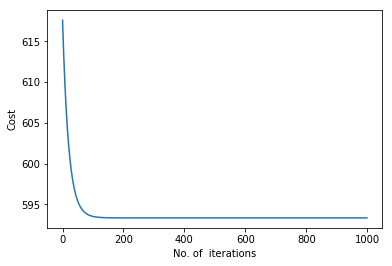

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
le = LabelEncoder()

df = pd.read_csv('titanic_train.csv')   #preprocessing of data 
Y = df.Survived
df2 = df.drop(['PassengerId','Name','Ticket'],axis = 1)
df2.Age = df2.Age.fillna(df2.Age.mean())
df2.Cabin = df2.Cabin.fillna(0)
df2.Cabin = le.fit_transform(df2.Cabin)
df2.Embarked = le.fit_transform(df2.Embarked)
df2.Sex = le.fit_transform(df2.Sex)


X = df2                                #defining variables                                         
Y = Y.as_matrix()
X = X.as_matrix()
Y = Y.reshape(-1,1)
b = 0
X = scaler.fit_transform(X)            #scaling                               
 

def sigm (Z):                          #sigmoid functn  
    return 1/(np.exp(-Z)+1)


def log_reg (X ,Y,lr,b,iterations):    # logistic regression functn   lr = learning rate 
    (m,n) = X.shape
    W = np.zeros(n)
    W = W.reshape(-1,1)
    cost = np.zeros(iterations)
    for i in range(iterations):        #  loop for iterations 
        Z = X.dot(W) + b
        A = sigm(Z)
        dZ = A - Y
        dW = X.T.dot(Z)/m
        db = np.sum(dZ)/m
        W = W - dW*lr
        b = b - db*lr
        cost[i] = np.sum((Y.T.dot(np.log(A))+(1-Y).T.dot(np.log(1-A)))*(-1/m))
    return cost,W,b



cost,W,b = log_reg(X,Y,0.1,b,1000)  #functn call on input 

import matplotlib.pyplot as plt        # plot Cost vs no. of iterarions
plt.plot(np.arange(len(cost)),cost)
plt.xlabel("No. of  iterations")
plt.ylabel("Cost")
plt.show()
